<a href="https://colab.research.google.com/github/ashayer/machine_learning/blob/main/Arandeep_Hayer_Backpropagation_Programming_11_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
import time
from sklearn.metrics import accuracy_score

Dataset

In [3]:
data = [((0,0),0), ((0,1),1), ((1,0),1), ((1,1),0)]
F = lambda m, x: m[0]*x[0] + m[1]*x[1] + m[2]*x[2]
G = lambda y: 1/(1+np.exp(-y))

## Functions used

#### Model function

In [4]:
F = lambda m, x: m[0]*x[0] + m[1]*x[1] + m[2]*x[2]

#### Sigmoid function

In [5]:
G = lambda y: 1/(1+np.exp(-y))

#### Classification function

In [7]:
def classify(y):
  if (y > 0.5):
    return 1
  else:
    return 0

#### Random values

In [8]:
def random_initial():
  return np.random.uniform(-0.01, 0.01,3)

In [22]:
def backprop(learningrate):
  start = time.time()

  # initialize x and z vectors
  X = [1,0,0] 
  Z = [1,0,0]

  # initalize w1/w2 vectors
  W1 = random_initial()
  W2 = random_initial()
  W = (W1,W2)

  # initialzie v1 vector
  V1 = random_initial()

  # initialize deltavectors
  deltaW1 = [0,0,0]
  deltaW2 = [0,0,0]
  deltaW = (deltaW1, deltaW2)
  deltaV1 = [0,0,0]

  #store intial random weights
  copyW1 = W1
  copyW2 = W2

  epochs = 0

  accuracyList = []
  squaredErrorList = []
  xAxis = [] 
  outputList = []

  for i in range(2000000):
    # get the inputs, and class values from data after shuffling
    random.shuffle(data)
    XS = [x for x,y in data]
    X1s = [x for (x,y) in XS]
    X2s = [y for (x,y) in XS]

    real = [y for x,y in data]

    predicted = []
    tempError = []

    for j in range(len(data)):
      
      # get current x1, x2, and r values based on current data input
      X[1] = X1s[j]
      X[2] = X2s[j]
      R1 = real[j]

      # calculate z values 
      Z[1] = G(F(W[0], X))
      Z[2] = G(F(W[1], X))

      # calcualte y1 value
      Y1 = G(F(V1, Z))

      predicted.append(classify(Y1))

      # calculate delta values
      deltaV1[0] = learningrate * (R1 - Y1) * Z[0]
      deltaV1[1] = learningrate * (R1 - Y1) * Z[1]
      deltaV1[2] = learningrate * (R1 - Y1) * Z[2]

      deltaW[0][0] = learningrate * ((R1 - Y1) * V1[1]) * Z[1] * (1 - Z[1]) * X[0]
      deltaW[0][1] = learningrate * ((R1 - Y1) * V1[1]) * Z[1] * (1 - Z[1]) * X[1]
      deltaW[0][2] = learningrate * ((R1 - Y1) * V1[1]) * Z[1] * (1 - Z[1]) * X[2]

      deltaW[1][0] = learningrate * ((R1 - Y1) * V1[2]) * Z[2] * (1 - Z[2]) * X[0]
      deltaW[1][1] = learningrate * ((R1 - Y1) * V1[2]) * Z[2] * (1 - Z[2]) * X[1]
      deltaW[1][2] = learningrate * ((R1 - Y1) * V1[2]) * Z[2] * (1 - Z[2]) * X[2]

      tempError.append((R1 - Y1)**2)

      # update w and v vectors
      V1 = np.add(V1,deltaV1)
      W = np.add(W,deltaW)

    # gather data every 1000 iterations
    if(i % 1000 == 0):
      accuracyList.append(accuracy_score(real,predicted))
      squaredErrorList.append(np.mean(tempError))
      xAxis.append(i)

    epochs = i

  end = time.time()

  return {
      'learningrate': learningrate,
      'epochs': epochs,
      'initialw1': copyW1,
      'initialw2': copyW2,
      'finalw1': W[0],
      'finalw2': W[1],
      'xAxis': xAxis,
      'SElist': squaredErrorList,
      'alist': accuracyList,
      'elapsed': (end-start),
  }
  

Function to print values and plot the accuracy and squared error overtime

In [20]:
def print_values(result):
  xAxis = result['xAxis']
  squaredErrorList = result['SElist']
  accuracyList = result['alist']
  learningrate = result['learningrate']
  epochs = result['epochs']
  copyW1 = result['initialw1']
  copyW2 = result['initialw2']
  w1 = result['finalw1']
  w2 = result['finalw2']
  elapsed = result['elapsed']

  print("Learning Rate =", learningrate)
  print("Epochs = ", epochs)
  print("Inital W1 =", copyW1)
  print("Inital W2 =", copyW2)
  print("Final W1 =", w1)
  print("Final W2 =", w2)
  print("Time elapsed =", elapsed)

  plt.plot(xAxis, squaredErrorList)
  plt.ylabel("Squared error")
  plt.xlabel("Iterations")
  plt.show()

  plt.plot(xAxis, accuracyList)
  plt.ylabel("Accuracy")
  plt.xlabel("Iterations")
  plt.show()

Learning Rate = 0.1
Epochs =  1999999
Inital W1 = [0.00472568 0.00986697 0.00594657]
Inital W2 = [ 0.00078546 -0.00312928 -0.00344536]
Final W1 = [12.11989803 -8.1021178  -8.10212113]
Final W2 = [ 4.37792436 -9.70730158 -9.70733346]
Time elapsed = 276.8955101966858


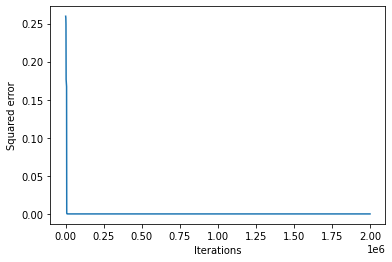

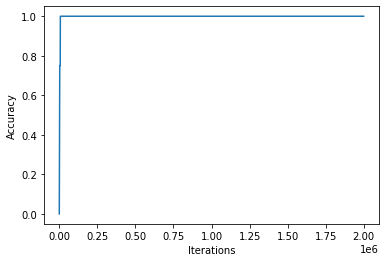

In [32]:
result1 = backprop(0.1)
print_values(result1)


Learning Rate = 0.1
Epochs =  1999999
Inital W1 = [-0.00984403 -0.00475171 -0.00765715]
Inital W2 = [0.00791474 0.0017941  0.00767894]
Final W1 = [  5.090713   -11.46632247 -11.46637257]
Final W2 = [11.99860574 -8.02336032 -8.02336166]
Time elapsed = 279.6227059364319


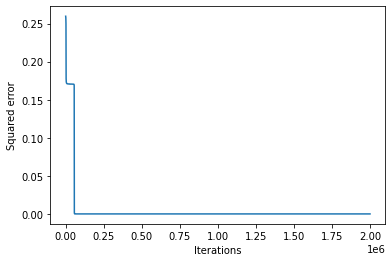

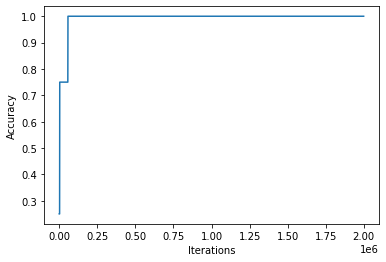

In [25]:
result2 = backprop(0.1)
print_values(result2)

Learning Rate = 0.01
Epochs =  1999999
Inital W1 = [-0.00390844 -0.00435845 -0.00290956]
Inital W2 = [ 0.00442775 -0.00461458 -0.00800068]
Final W1 = [10.92487742 -7.30605846 -7.30605761]
Final W2 = [ 3.78345938 -8.54161798 -8.54161254]
Time elapsed = 279.3947412967682


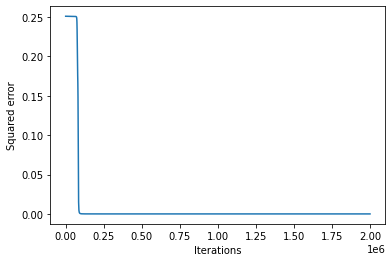

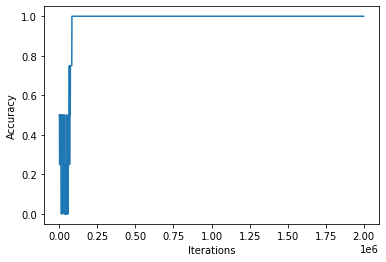

In [26]:
result3 = backprop(0.01)
print_values(result3)

Learning Rate = 0.01
Epochs =  1999999
Inital W1 = [-0.00485166  0.00515972  0.00703813]
Inital W2 = [ 0.00226702 -0.00363535 -0.00319522]
Final W1 = [ 4.03832013 -9.05221523 -9.05221705]
Final W2 = [10.82684851 -7.24048903 -7.24048922]
Time elapsed = 276.7912001609802


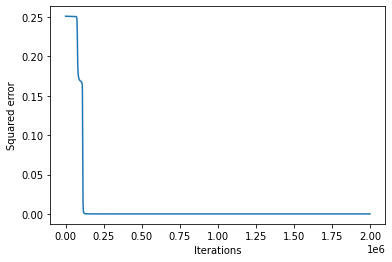

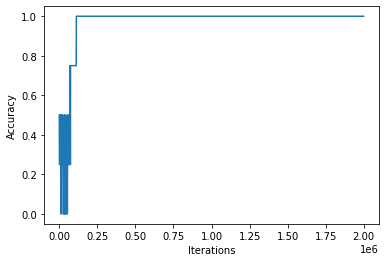

In [33]:
result4 = backprop(0.01)
print_values(result4)

Learning Rate = 0.001
Epochs =  1999999
Inital W1 = [-0.00020854  0.00299827 -0.00938004]
Inital W2 = [-0.00945778  0.00503644  0.00806868]
Final W1 = [-0.1189888  -0.05537738 -0.06788565]
Final W2 = [-0.12978288 -0.05968064 -0.05714779]
Time elapsed = 284.3923726081848


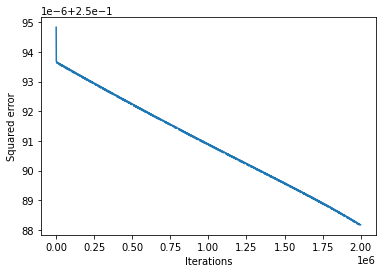

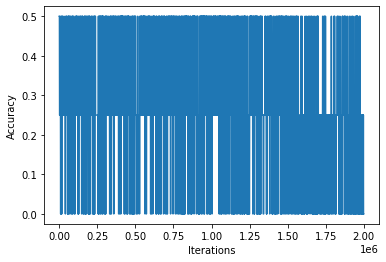

In [39]:
result5 = backprop(0.001)
print_values(result5)

Learning Rate = 0.001
Epochs =  1999999
Inital W1 = [-0.00864572 -0.00249035  0.00907301]
Inital W2 = [-0.00872878 -0.00310624 -0.00091119]
Final W1 = [-0.12803083 -0.0635995  -0.05281047]
Final W2 = [-0.12774209 -0.06390787 -0.06184128]
Time elapsed = 284.7271308898926


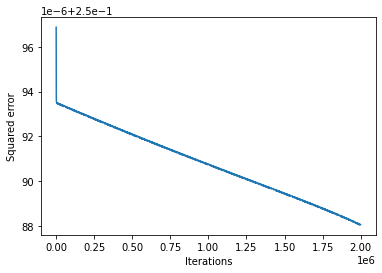

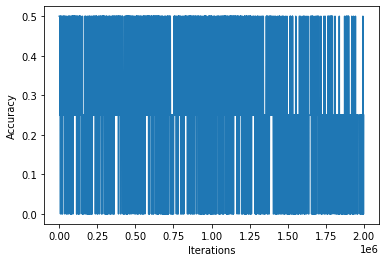

In [40]:
result6 = backprop(0.001)
print_values(result6)

Learning Rate = 0.0001
Epochs =  1999999
Inital W1 = [-0.00577805  0.00302939  0.00389335]
Inital W2 = [0.00794036 0.00369841 0.00416039]
Final W1 = [-0.00702601  0.00240462  0.00326852]
Final W2 = [0.00668487 0.00307186 0.00353355]
Time elapsed = 290.06160736083984


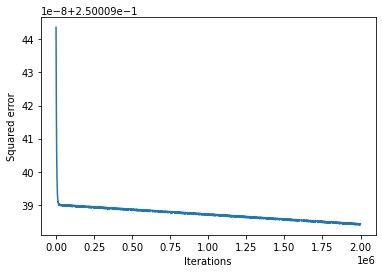

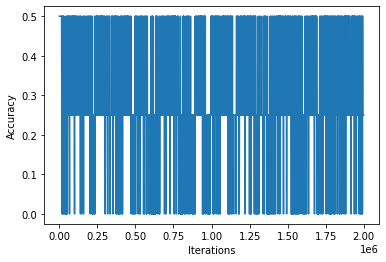

In [41]:
result7 = backprop(0.0001)
print_values(result7)

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Iterations')]

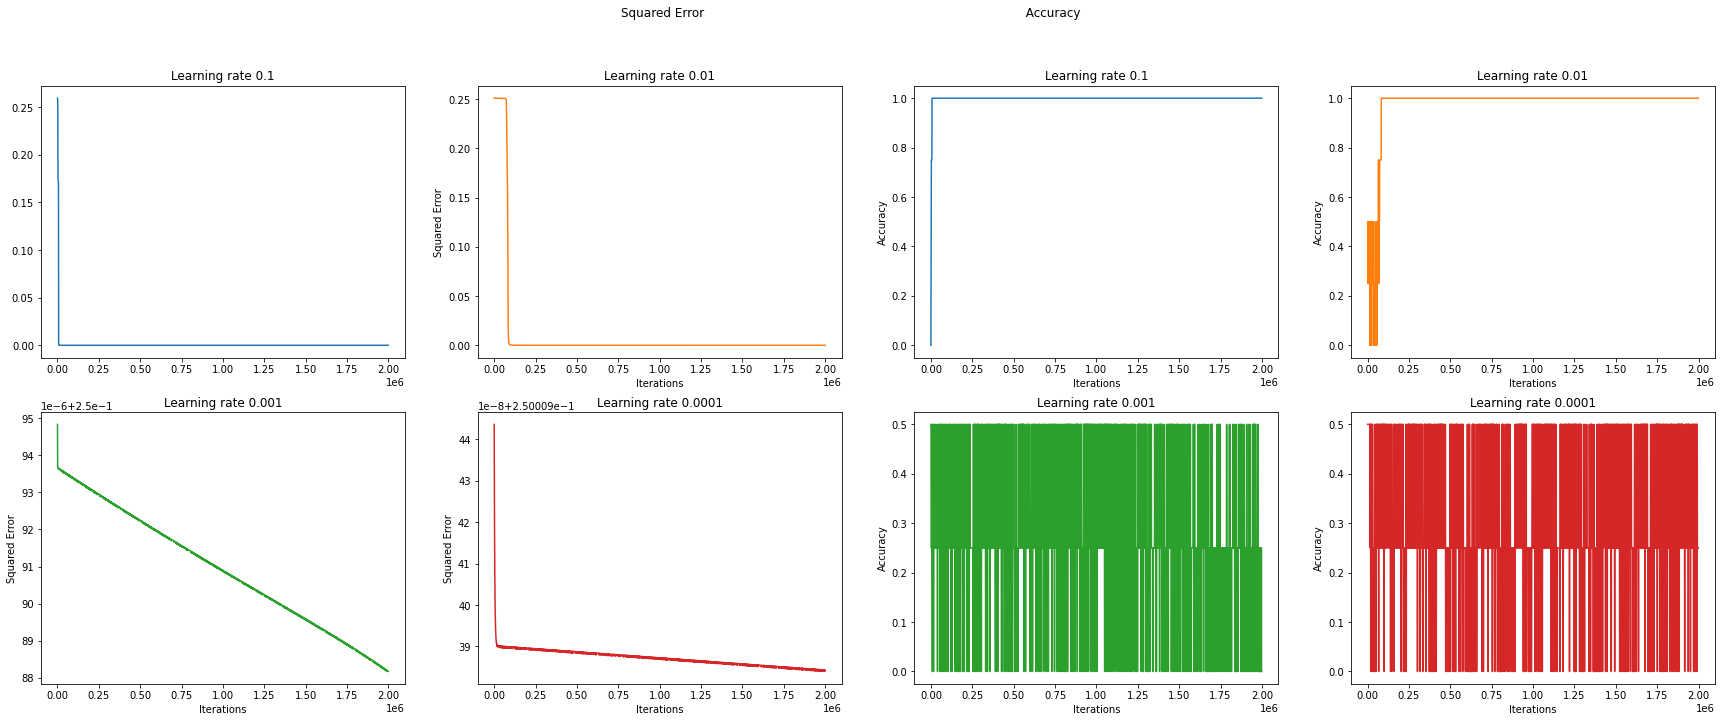

In [42]:
fig, axs = plt.subplots(2, 4)
fig.set_size_inches(30,11)
fig.suptitle("Squared Error                                                                                   Accuracy")

axs[0, 0].plot(result1['xAxis'], result1['SElist'])
axs[0, 0].set_title('Learning rate 0.1')
axs[0, 1].set(xlabel='Iterations', ylabel='Squared Error')

axs[0, 1].plot(result1['xAxis'], result3['SElist'], 'tab:orange')
axs[0, 1].set_title('Learning rate 0.01')
axs[0, 1].set(xlabel='Iterations', ylabel='Squared Error')

axs[1, 0].plot(result1['xAxis'], result5['SElist'], 'tab:green')
axs[1, 0].set_title('Learning rate 0.001')
axs[1, 0].set(xlabel='Iterations', ylabel='Squared Error')

axs[1, 1].plot(result1['xAxis'], result7['SElist'], 'tab:red')
axs[1, 1].set_title('Learning rate 0.0001')
axs[1, 1].set(xlabel='Iterations', ylabel='Squared Error')


axs[0, 2].plot(result1['xAxis'], result1['alist'])
axs[0, 2].set_title('Learning rate 0.1')
axs[0, 2].set(xlabel='Iterations', ylabel='Accuracy')

axs[0, 3].plot(result1['xAxis'], result3['alist'], 'tab:orange')
axs[0, 3].set_title('Learning rate 0.01')
axs[0, 3].set(xlabel='Iterations', ylabel='Accuracy')


axs[1, 2].plot(result1['xAxis'], result5['alist'], 'tab:green')
axs[1, 2].set_title('Learning rate 0.001')
axs[1, 2].set(xlabel='Iterations', ylabel='Accuracy')


axs[1, 3].plot(result1['xAxis'], result7['alist'], 'tab:red')
axs[1, 3].set_title('Learning rate 0.0001')
axs[1, 3].set(xlabel='Iterations', ylabel='Accuracy')


# Method

For this assignment I decided to keep the number of epochs static between all learning rates. This made it easier for me to plot and contrast them. I still do not understand recognizing convergence in code so that also influenced that decision as well.

I chose 2 million as I think it was enough to showcase the trend of the learning rates < 0.01 as the ones greater than that converged much sooner at around only 200k. 

# Conclusion

Based on the graphs it seems as if the learning rates < 0.01 would take much longer to reach convergence. The squared error is decreasing, but at a very slow rate so many millions of more iterations are possibly required for them to reach convergence. 

The learning rates 0.1 and 0.01 "converge" at around 200k epochs while the other two do not within the 2 million.